<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject: DataFrame of Your NWS Weather Forecast</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/dataframe-nws-weather-forecast/">https://discovery.cs.illinois.edu/microproject/dataframe-nws-weather-forecast/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data API: National Weather Service (NWS) Weather Forecast

The National Weather Service allows, for free, "developers access to critical forecasts, alerts, and observations, along with other weather data."  You can find the full documentation of their API at: [https://www.weather.gov/documentation/services-web-api](https://www.weather.gov/documentation/services-web-api).

Since weather data is based on your location, you need to find the latitude and longitude of coordinate of your location!

- One quick way to do this is to pull up [Google Maps](https://maps.google.com/) and **right click** on a location.
- The first option will be the `latitude, longitude` of the location of your click on the map.  You can click it to copy it to your clipboard!

Once you have your location, add each component to a variable below:

In [1]:
latitude = 40.105817612717246
longitude = -88.23565128916296

### Finding Your Forecast Area

The National Weather Service API provides a `/points/` endpoint that uses the `latitude,longitude` value to return a weather forecast.  The full URL for this endpoint is in the following format:

```
https://api.weather.gov/points/LATITUDE,LONGITUDE
```

This endpoint also returns a JSON instead of a CSV.  Here's q uick summary of loading a JSON instead of a CSV:

- Using pandas, use `pd.read_json` to read a JSON (including this JSON that includes the weather in your location).
- Make sure to replace `LATITUDE` and `LONGITUDE` in the URL with your actual latitude and longitude.
- This JSON is organized as a **series**.  As a parameter to `read_json`, make sure to include `typ="series"`.
- For example: `pd.read_json(..., typ="series")`.

Store the result in a variable named `pointsJSON`:

In [4]:
import pandas as pd
pointsJSON = pd.read_json("https://api.weather.gov/points/40.105817612717246,-88.23565128916296", typ="series")
pointsJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
id              https://api.weather.gov/points/40.1058,-88.2357
type                                                    Feature
geometry      {'type': 'Point', 'coordinates': [-88.2357, 40...
properties    {'@id': 'https://api.weather.gov/points/40.105...
dtype: object

### Finding Your Forecast URL

The JSON you just loaded has multiple fields including two fields with data:

- `geometry`, which include the geometric area for the result (you supplied a single point, but weather forecasts are given for areas that can be many square miles)
- `properties`, which includes all properties about the location you requested

You can inspect the data further by running `pointsJSON["geometry"]` or `pointsJSON["properties"]`.  Inspect the **properties** and look for the URL that provides the **hourly forecast**.


In [6]:
pointsJSON["geometry"]
pointsJSON["properties"]

{'@id': 'https://api.weather.gov/points/40.1058,-88.2357',
 '@type': 'wx:Point',
 'cwa': 'ILX',
 'forecastOffice': 'https://api.weather.gov/offices/ILX',
 'gridId': 'ILX',
 'gridX': 95,
 'gridY': 71,
 'forecast': 'https://api.weather.gov/gridpoints/ILX/95,71/forecast',
 'forecastHourly': 'https://api.weather.gov/gridpoints/ILX/95,71/forecast/hourly',
 'forecastGridData': 'https://api.weather.gov/gridpoints/ILX/95,71',
 'observationStations': 'https://api.weather.gov/gridpoints/ILX/95,71/stations',
 'relativeLocation': {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-88.197323, 40.110126]},
  'properties': {'city': 'Urbana',
   'state': 'IL',
   'distance': {'unitCode': 'wmoUnit:m', 'value': 3299.0503732382},
   'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 261}}},
 'forecastZone': 'https://api.weather.gov/zones/forecast/ILZ045',
 'county': 'https://api.weather.gov/zones/county/ILC019',
 'fireWeatherZone': 'https://api.weather.gov/zones/fire/ILZ045',
 't

### Record Your Forecast URL

Finally, record the URL that you can use to find the hourly forecast for your location:

In [7]:
hourlyForecastURL = "https://api.weather.gov/gridpoints/ILX/95,71/forecast/hourly"
hourlyForecastURL

'https://api.weather.gov/gridpoints/ILX/95,71/forecast/hourly'

<hr style="color: #DD3403;">

## Puzzle 1: Loading Your Weather Forecast as a DataFrame

In the same way as you did in the beginning of this MicroProject, use the hourlyForecastURL and `pd.read_json` to load the your weather forecast.  Store your result in the variable `forecastJSON`:

In [8]:
forecastJSON = pd.read_json("https://api.weather.gov/gridpoints/ILX/95,71/forecast/hourly", typ="series")
forecastJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[-88.2476...
properties    {'updated': '2023-02-28T03:40:56+00:00', 'unit...
dtype: object

### Finding the Forecast Data

Inside of the `properties` data within `forecastJSON`, the `periods` data provides a **well-defined, structured** set of data that contains the forecast for every hour for your location.

Check out how it looks in the raw form:

In [12]:
forecastJSON["properties"]["periods"]

[{'number': 1,
  'name': '',
  'startTime': '2023-02-27T22:00:00-06:00',
  'endTime': '2023-02-27T23:00:00-06:00',
  'isDaytime': False,
  'temperature': 45,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 5},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 86},
  'windSpeed': '21 mph',
  'windDirection': 'WNW',
  'icon': 'https://api.weather.gov/icons/land/night/wind_ovc,0?size=small',
  'shortForecast': 'Cloudy',
  'detailedForecast': ''},
 {'number': 2,
  'name': '',
  'startTime': '2023-02-27T23:00:00-06:00',
  'endTime': '2023-02-28T00:00:00-06:00',
  'isDaytime': False,
  'temperature': 44,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 5},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'valu

Going deeper, the `properties` key has data related to the hourly forecast.  To view that, we can view `forecastJSON["properties"]`:

In [13]:
forecastJSON["properties"]

{'updated': '2023-02-28T03:40:56+00:00',
 'units': 'us',
 'forecastGenerator': 'HourlyForecastGenerator',
 'generatedAt': '2023-02-28T04:27:41+00:00',
 'updateTime': '2023-02-28T03:40:56+00:00',
 'validTimes': '2023-02-27T21:00:00+00:00/P7DT4H',
 'elevation': {'unitCode': 'wmoUnit:m', 'value': 227.9904},
 'periods': [{'number': 1,
   'name': '',
   'startTime': '2023-02-27T22:00:00-06:00',
   'endTime': '2023-02-27T23:00:00-06:00',
   'isDaytime': False,
   'temperature': 45,
   'temperatureUnit': 'F',
   'temperatureTrend': None,
   'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
   'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 5},
   'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 86},
   'windSpeed': '21 mph',
   'windDirection': 'WNW',
   'icon': 'https://api.weather.gov/icons/land/night/wind_ovc,0?size=small',
   'shortForecast': 'Cloudy',
   'detailedForecast': ''},
  {'number': 2,
   'name': '',
   'startTime': '2023-02-27T23:00:00-06:

Finally, going even deeper, the `periods` key contains a data for each forecast period (each hour).  This is viewed by going two levels deep or `forecastJSON["properties"]["periods"]`:

In [14]:
forecastJSON["properties"]["periods"]

[{'number': 1,
  'name': '',
  'startTime': '2023-02-27T22:00:00-06:00',
  'endTime': '2023-02-27T23:00:00-06:00',
  'isDaytime': False,
  'temperature': 45,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 5},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 86},
  'windSpeed': '21 mph',
  'windDirection': 'WNW',
  'icon': 'https://api.weather.gov/icons/land/night/wind_ovc,0?size=small',
  'shortForecast': 'Cloudy',
  'detailedForecast': ''},
 {'number': 2,
  'name': '',
  'startTime': '2023-02-27T23:00:00-06:00',
  'endTime': '2023-02-28T00:00:00-06:00',
  'isDaytime': False,
  'temperature': 44,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 5},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'valu

### Loading the Data at a DataFrame

Since we have **clean, structured data**, we can read it into pandas!  The code below creates a DataFrame out of the above data by using the `pd.DataFrame` command:

In [15]:
df = pd.DataFrame(forecastJSON["properties"]["periods"])
df

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,,2023-02-27T22:00:00-06:00,2023-02-27T23:00:00-06:00,False,45,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 5}","{'unitCode': 'wmoUnit:percent', 'value': 86}",21 mph,WNW,https://api.weather.gov/icons/land/night/wind_...,Cloudy,
1,2,,2023-02-27T23:00:00-06:00,2023-02-28T00:00:00-06:00,False,44,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 5}","{'unitCode': 'wmoUnit:percent', 'value': 89}",20 mph,WNW,"https://api.weather.gov/icons/land/night/ovc,0...",Cloudy,
2,3,,2023-02-28T00:00:00-06:00,2023-02-28T01:00:00-06:00,False,43,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 4.444444...","{'unitCode': 'wmoUnit:percent', 'value': 89}",18 mph,WNW,"https://api.weather.gov/icons/land/night/ovc,0...",Cloudy,
3,4,,2023-02-28T01:00:00-06:00,2023-02-28T02:00:00-06:00,False,42,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 3.888888...","{'unitCode': 'wmoUnit:percent', 'value': 89}",17 mph,WNW,"https://api.weather.gov/icons/land/night/ovc,0...",Cloudy,
4,5,,2023-02-28T02:00:00-06:00,2023-02-28T03:00:00-06:00,False,41,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 3.333333...","{'unitCode': 'wmoUnit:percent', 'value': 89}",16 mph,WNW,"https://api.weather.gov/icons/land/night/ovc,0...",Cloudy,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,,2023-03-06T05:00:00-06:00,2023-03-06T06:00:00-06:00,False,34,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 5}","{'unitCode': 'wmoUnit:degC', 'value': -1.11111...","{'unitCode': 'wmoUnit:percent', 'value': 85}",12 mph,S,"https://api.weather.gov/icons/land/night/sct,5...",Partly Cloudy,
152,153,,2023-03-06T06:00:00-06:00,2023-03-06T07:00:00-06:00,True,34,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 7}","{'unitCode': 'wmoUnit:degC', 'value': -1.11111...","{'unitCode': 'wmoUnit:percent', 'value': 85}",13 mph,S,"https://api.weather.gov/icons/land/day/sct,7?s...",Mostly Sunny,
153,154,,2023-03-06T07:00:00-06:00,2023-03-06T08:00:00-06:00,True,35,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 7}","{'unitCode': 'wmoUnit:degC', 'value': -0.55555...","{'unitCode': 'wmoUnit:percent', 'value': 85}",13 mph,S,"https://api.weather.gov/icons/land/day/sct,7?s...",Mostly Sunny,
154,155,,2023-03-06T08:00:00-06:00,2023-03-06T09:00:00-06:00,True,37,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 7}","{'unitCode': 'wmoUnit:degC', 'value': 0.555555...","{'unitCode': 'wmoUnit:percent', 'value': 85}",14 mph,S,"https://api.weather.gov/icons/land/day/bkn,7?s...",Partly Sunny,


<hr style="color: #DD3403;">

## Puzzle 2: Exploring Your Weather

Now that you have the weather forecast for **your location** loaded into the DataFrame `df`, it's time to nerd out with it!

### Your Warmest Upcoming Temperature

Using your data, find the warmest temperature in the entire forecast!  Save that row as `df_warmest`:

In [16]:
df_warmest = df.nlargest(1, "temperature")
df_warmest

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
41,42,,2023-03-01T15:00:00-06:00,2023-03-01T16:00:00-06:00,True,63,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 2}","{'unitCode': 'wmoUnit:degC', 'value': 7.222222...","{'unitCode': 'wmoUnit:percent', 'value': 52}",14 mph,W,"https://api.weather.gov/icons/land/day/bkn,2?s...",Partly Sunny,


### Your Coldest Upcoming Temperature

Using your data, find the coldest temperature in the entire forecast!  Save that row as `df_coldest`:

In [17]:
df_coldest = df.nsmallest(1, "temperature")
df_coldest

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
103,104,,2023-03-04T05:00:00-06:00,2023-03-04T06:00:00-06:00,False,22,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 1}","{'unitCode': 'wmoUnit:degC', 'value': -6.66666...","{'unitCode': 'wmoUnit:percent', 'value': 92}",10 mph,NNW,"https://api.weather.gov/icons/land/night/sct,1...",Partly Cloudy,


### Hours of Sky Conditions

The `shortForecast` column provides a brief summary of the forecasted condition of the sky for each hour.  Create a DataFrame that contains a summary of upcoming sky conditions in only two columns:

- `shortForecast`, and
- `count`, containing the number of times that `shortForecast` appears in the forecast

That means the summary will have the following structure:

|    | shortForecast | count |
| -- | ------------- | ----- |
|  0 | Chance Light Rain | 6 |
|  1 | Mostly Clear	| 11 |
| ... | ... | ... |

Save the summary in the `skySummary` variable:

In [29]:
df1 = df.groupby("shortForecast").agg("count").reset_index()
skySummary = pd.DataFrame(df1["shortForecast"])
skySummary["count"] = df1["temperature"]
skySummary

,shortForecast,count
0,Chance Rain And Snow,6
1,Cloudy,7
2,Mostly Clear,11
3,Mostly Cloudy,17
4,Mostly Sunny,22
5,Partly Cloudy,44
6,Partly Sunny,15
7,Rain And Snow,6
8,Rain And Snow Likely,12
9,Sunny,16


<hr style="color: #DD3403;">

## Puzzle 3: Create a Scatter Plot

Finally, let's create a scatter plot of your forecast!

Using `df.plot.scatter`, you must specify the `x` column name and `y` column name for your scatter plot to use the command:

```
df.plot.scatter(x="x-column", y="y-column")
```

Using your weather forecast:

- Use the starting date of the forecast as your `x` value,
- Use the temperature as your `y` value,
- Create your scatter plot! :)

KeyError: "None of [Index(['2023-02-27T22:00:00-06:00', '2023-02-27T23:00:00-06:00',\n       '2023-02-28T00:00:00-06:00', '2023-02-28T01:00:00-06:00',\n       '2023-02-28T02:00:00-06:00', '2023-02-28T03:00:00-06:00',\n       '2023-02-28T04:00:00-06:00', '2023-02-28T05:00:00-06:00',\n       '2023-02-28T06:00:00-06:00', '2023-02-28T07:00:00-06:00',\n       ...\n       '2023-03-06T00:00:00-06:00', '2023-03-06T01:00:00-06:00',\n       '2023-03-06T02:00:00-06:00', '2023-03-06T03:00:00-06:00',\n       '2023-03-06T04:00:00-06:00', '2023-03-06T05:00:00-06:00',\n       '2023-03-06T06:00:00-06:00', '2023-03-06T07:00:00-06:00',\n       '2023-03-06T08:00:00-06:00', '2023-03-06T09:00:00-06:00'],\n      dtype='object', length=156)] are in the [columns]"

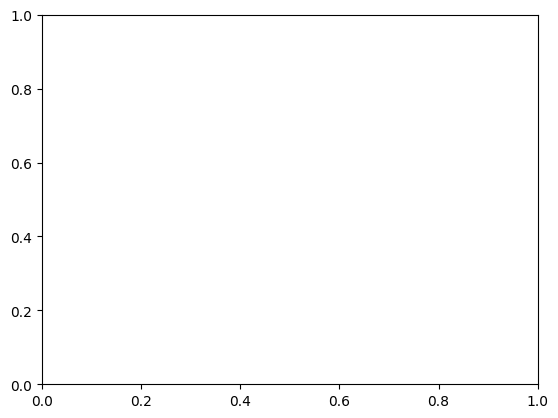

In [30]:
df.plot.scatter(x = df["startTime"], y = df["temperature"])

<hr style="color: #DD3403;">

## 🔬 Microproject Checkpoint Tests 🔬

In [31]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for the microproject.
# - If this cell runs without any error in the output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.
tada = "\N{PARTY POPPER}"

assert("/points/" in pointsJSON["id"])
assert(f"/{int(latitude)}" in pointsJSON["id"])
assert(f",{int(longitude)}" in pointsJSON["id"])
assert("/gridpoints/" in hourlyForecastURL)
assert("/forecast/hourly" in hourlyForecastURL)
print(f"{tada} Data API: All Tests Passed! {tada}")


assert("df" in vars())
assert("startTime" in df)
assert("temperature" in df)
print(f"{tada} Puzzle 1: All Tests Passed! {tada}")


assert( len(df_warmest) == 1 )
assert( df_warmest["temperature"].values[0] == max(df["temperature"]) )

assert( len(df_coldest) == 1 )
assert( df_coldest["temperature"].values[0] == min(df["temperature"]) )

assert( len(skySummary) == len(df["shortForecast"].unique()) )
pd.testing.assert_frame_equal(skySummary.sort_values(["count", "shortForecast"]).set_index("shortForecast"), pd.DataFrame(df["shortForecast"].value_counts()).reset_index().rename({"index": "shortForecast", "shortForecast": "count"}, axis=1).sort_values(["count", "shortForecast"]).set_index("shortForecast")), "Your skySummary is incorrect."
print(f"{tada} Puzzle 2: All Tests Passed! {tada}")

print(f"{tada}{tada} All Tests Passed! {tada}{tada}")

🎉 Data API: All Tests Passed! 🎉
🎉 Puzzle 1: All Tests Passed! 🎉
🎉 Puzzle 2: All Tests Passed! 🎉
🎉🎉 All Tests Passed! 🎉🎉


<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the instructions to commit and grade this MicroProject!
